In [1]:
import pandas as pd

In [2]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

**Exploratory Data Analysis**

In [3]:
train.head(80)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,NaN,0,0,374746,8.0500,NaN,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [9]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


import python library for visulization


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
def bar_chart(feature):
  survived = train[train['Survived']==1][feature].value_counts()
  dead= train[train['Survived']==0][feature].value_counts()
  df=pd.DataFrame([survived,dead])
  df.index=['Survived','Dead']
  df.plot(kind='bar',stacked=True,figsize=(10,5),colormap='viridis')

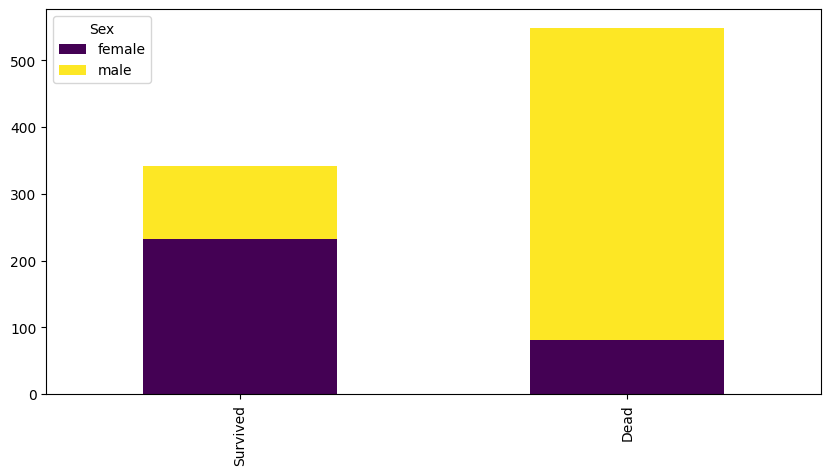

In [13]:
bar_chart("Sex")

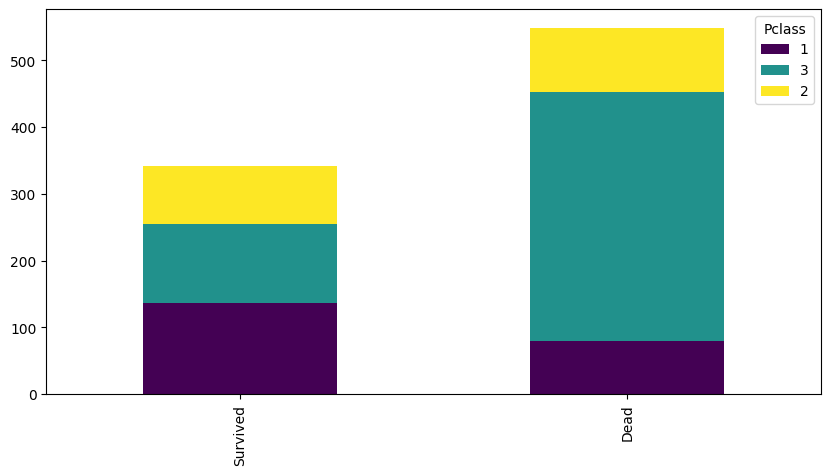

In [14]:
bar_chart("Pclass")

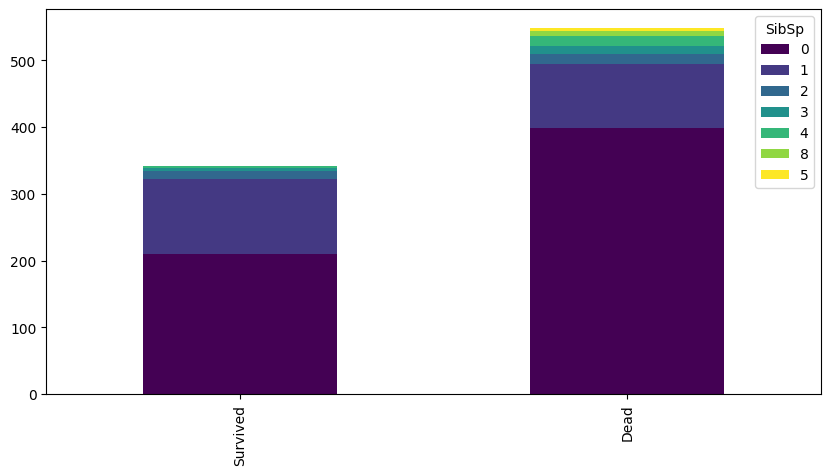

In [15]:
bar_chart("SibSp")

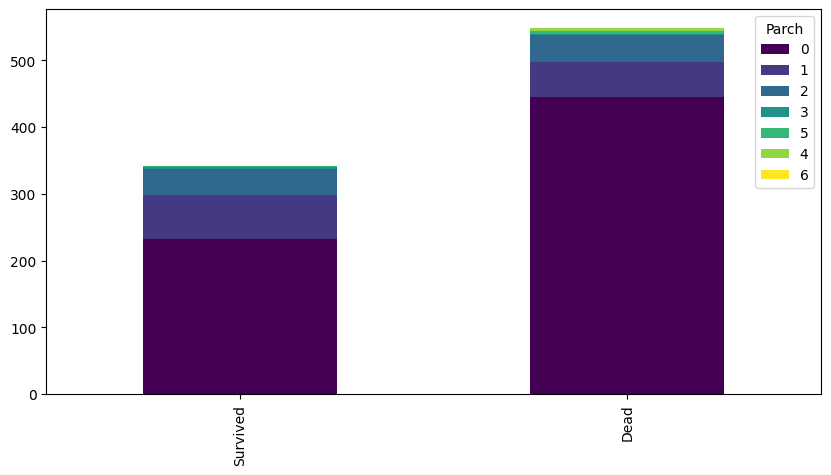

In [16]:
bar_chart("Parch")

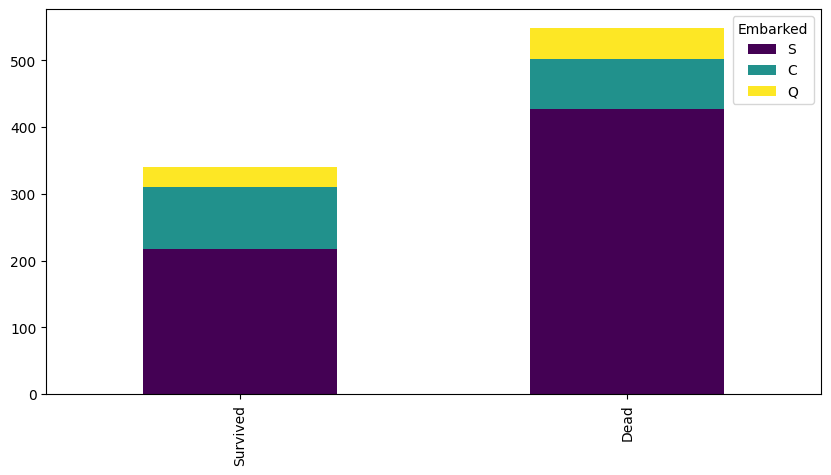

In [17]:
bar_chart("Embarked")

In [18]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

# Extract Title from Name (Feature Engineering)

In [19]:
train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-608/1139515541.py:3: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [20]:
train['Title'].value_counts()

,count
Title,
Mr,517
Miss,182
Mrs,125
Master,40
Dr,7
Rev,6
Col,2
Mlle,2
Major,2


In [21]:
test['Title'].value_counts()

,count
Title,
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Ms,1
Dr,1
Dona,1


In [22]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2,
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)


In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [24]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


#Delete Unnecessary Feature

In [25]:
train.drop("Name",axis=1,inplace=True)
test.drop("Name",axis=1,inplace=True)

# Categorical Encoding for the 'Sex' , 'Embarked' column

In [26]:
sex_mapping ={"male":0,"female":1}
for dataset in train_test_data:
  dataset['Sex']=dataset['Sex'].map(sex_mapping)

In [27]:
embarked_mapping={'S':0,'C':1,'Q':2}
for dataset in train_test_data:
  dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

#Handling Missing Values





In [28]:
train['Age'] = train['Age'].fillna(
    train.groupby("Title")["Age"].transform("median"))

test['Age'] = test['Age'].fillna(
    test.groupby("Title")["Age"].transform("median"))

In [29]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])

In [30]:
test["Fare"]=test["Fare"].fillna(test["Fare"].median())

Cabin

In [31]:
train.Cabin.value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


In [32]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

<Axes: >

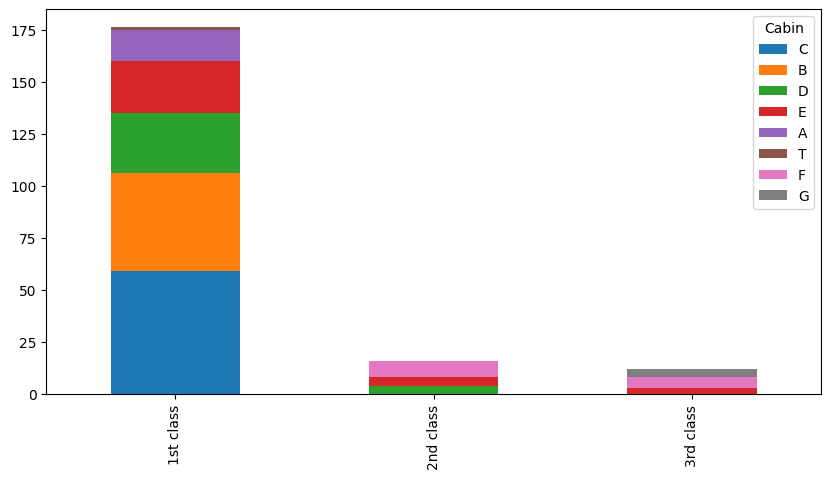

In [33]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [34]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [35]:
train["Cabin"]=train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"))
test["Cabin"]=test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"))

# Feature Engineering: Create 'FamilySize' from SibSp and Parch

In [36]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] +test['Parch']+1

#Feature Selection

In [37]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train= train.drop(features_drop,axis=1)
test=test.drop(features_drop,axis=1)
train=train.drop(['PassengerId'],axis=1)

In [38]:
X=train.drop('Survived',axis=1)
y=train['Survived']

#Modelling

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

In [75]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold=KFold(n_splits=15,shuffle=True,random_state=0)

#KNN


In [76]:
knn=KNeighborsClassifier(n_neighbors=13)
scoring='accuracy'
score=cross_val_score(knn,X,y,cv=k_fold,n_jobs=1,scoring=scoring)
print(score)

[0.73333333 0.66666667 0.81666667 0.73333333 0.65       0.75
 0.69491525 0.76271186 0.69491525 0.79661017 0.76271186 0.71186441
 0.71186441 0.81355932 0.6779661 ]


In [77]:
print(score.mean())

0.7318079096045197


#Decision Tree

In [78]:
DT = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(DT, X,y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.71666667 0.76666667 0.76666667 0.75       0.73333333
 0.74576271 0.79661017 0.79661017 0.79661017 0.79661017 0.79661017
 0.72881356 0.74576271 0.72881356]


In [79]:
print(score.mean())

0.7621468926553674


#Ramdom Forest

In [68]:
RF = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(RF,X,y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81666667 0.75       0.76666667 0.85       0.85       0.76666667
 0.83050847 0.86440678 0.74576271 0.86440678 0.79661017 0.81355932
 0.77966102 0.79661017 0.83050847]


In [69]:
print(score.mean())

0.808135593220339


#Naive Bayes

In [70]:
NB = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(NB,X,y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85       0.78333333 0.71666667 0.78333333 0.73333333 0.8
 0.77966102 0.83050847 0.77966102 0.84745763 0.83050847 0.77966102
 0.77966102 0.91525424 0.79661017]


In [71]:
print(score.mean())

0.8003766478342749


#SVM

In [80]:
svm = SVC()
scoring = 'accuracy'
score = cross_val_score(svm,X,y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.71666667 0.65       0.81666667 0.65       0.65       0.61666667
 0.76271186 0.71186441 0.6779661  0.76271186 0.59322034 0.69491525
 0.57627119 0.71186441 0.55932203]


In [81]:
print(score.mean())

0.676723163841808
